In [5]:
import mujoco
import mujoco.viewer
from testing_env import TestingEnv
import numpy as np
import os
import matplotlib.pyplot as plt

# model = mujoco.MjModel.from_xml_path("assets/env_test_minh.xml")
# data = mujoco.MjData(model)

model_path = os.path.join(os.getcwd(),"assets/env_test_minh.xml")
test_env = TestingEnv(xml_file=model_path)
model, data = test_env.model, test_env.data

vel_hist = []
avel_hist = []
angle_hist = []
d_goal_hist = []

with mujoco.viewer.launch_passive(model, data) as viewer:
	i = 0
	
	# # Select the camera
	CAMERA_NAME = "camera"
	viewer.cam.type = mujoco.mjtCamera.mjCAMERA_FIXED
	viewer.cam.fixedcamid = model.camera(CAMERA_NAME).id

	# enable viewer options:
	viewer.opt.frame = mujoco.mjtFrame.mjFRAME_BODY
	viewer.opt.flags[mujoco.mjtVisFlag.mjVIS_JOINT] = True

	while viewer.is_running():
		i+=1

		# --- control simulation
		ctrl = np.zeros(3)
		ctrl[0] = 0.01
		# ctrl[2] = 0.005
		
		# --- simulation
		d_goal = test_env.step(ctrl)		# distance between agent and goal
		d_goal_hist.append(d_goal)
		viewer.sync()
		
		if (i % 100 == 0):
			agent_pose, goal_pose = test_env._get_obs()
			print(agent_pose[0:3], goal_pose, d_goal)

			# ============= agent control debug =============
			# x, y, theta, x_dot, y_dot, theta_dot = agent_pose
			# print(f"theta_{i:7d}: {agent_pose[2]/np.pi*180:6.2f} deg | theta_dot_{i:7d}: {agent_pose[5]/np.pi*180:6.2f} deg/s", end="\r")
			# print(f"Time {i:10d} - Robot position ({x:5.2f},{y:5.2f}) | Goal position {goal_pose}")
			# lin_vel = np.sqrt(x_dot**2 + y_dot**2)

			# angle_hist.append(theta)
			# vel_hist.append(lin_vel)
			# avel_hist.append(theta_dot)
			# print(f"Current robot linear velocities at time {i:7d}: {lin_vel:10.5}", end="\r")

			# ============= goal pose debug =============
			# print(goal_pose)
			

[-1.99858717e+00 -1.99858717e+00  2.10916182e-24] [0.5  0.5  0.01] 3.5335358577859988
[-1.99717433e+00 -1.99717433e+00  4.21832364e-24] [0.5  0.5  0.01] 3.5315378096400534
[-1.99576150e+00 -1.99576150e+00  6.32748566e-24] [0.5  0.5  0.01] 3.529539761494108
[-1.99434867e+00 -1.99434867e+00  8.43664729e-24] [0.5  0.5  0.01] 3.5275417133481626
[-1.99293583e+00 -1.99293583e+00  1.05458097e-23] [0.5  0.5  0.01] 3.525543665202218
[-1.99152300e+00 -1.99152300e+00  1.26549713e-23] [0.5  0.5  0.01] 3.5235456170562727
[-1.99011017e+00 -1.99011017e+00  1.47641330e-23] [0.5  0.5  0.01] 3.521547568910328
[-1.98869733e+00 -1.98869733e+00  1.68732946e-23] [0.5  0.5  0.01] 3.5195495207643823
[-1.98728450e+00 -1.98728450e+00  1.89824562e-23] [0.5  0.5  0.01] 3.5175514726184374
[-1.98587167e+00 -1.98587167e+00  2.10916194e-23] [0.5  0.5  0.01] 3.515553424472492
[-1.98445883e+00 -1.98445883e+00  2.32007810e-23] [0.5  0.5  0.01] 3.5135553763265466
[-1.98304600e+00 -1.98304600e+00  2.53099427e-23] [0.5  0.

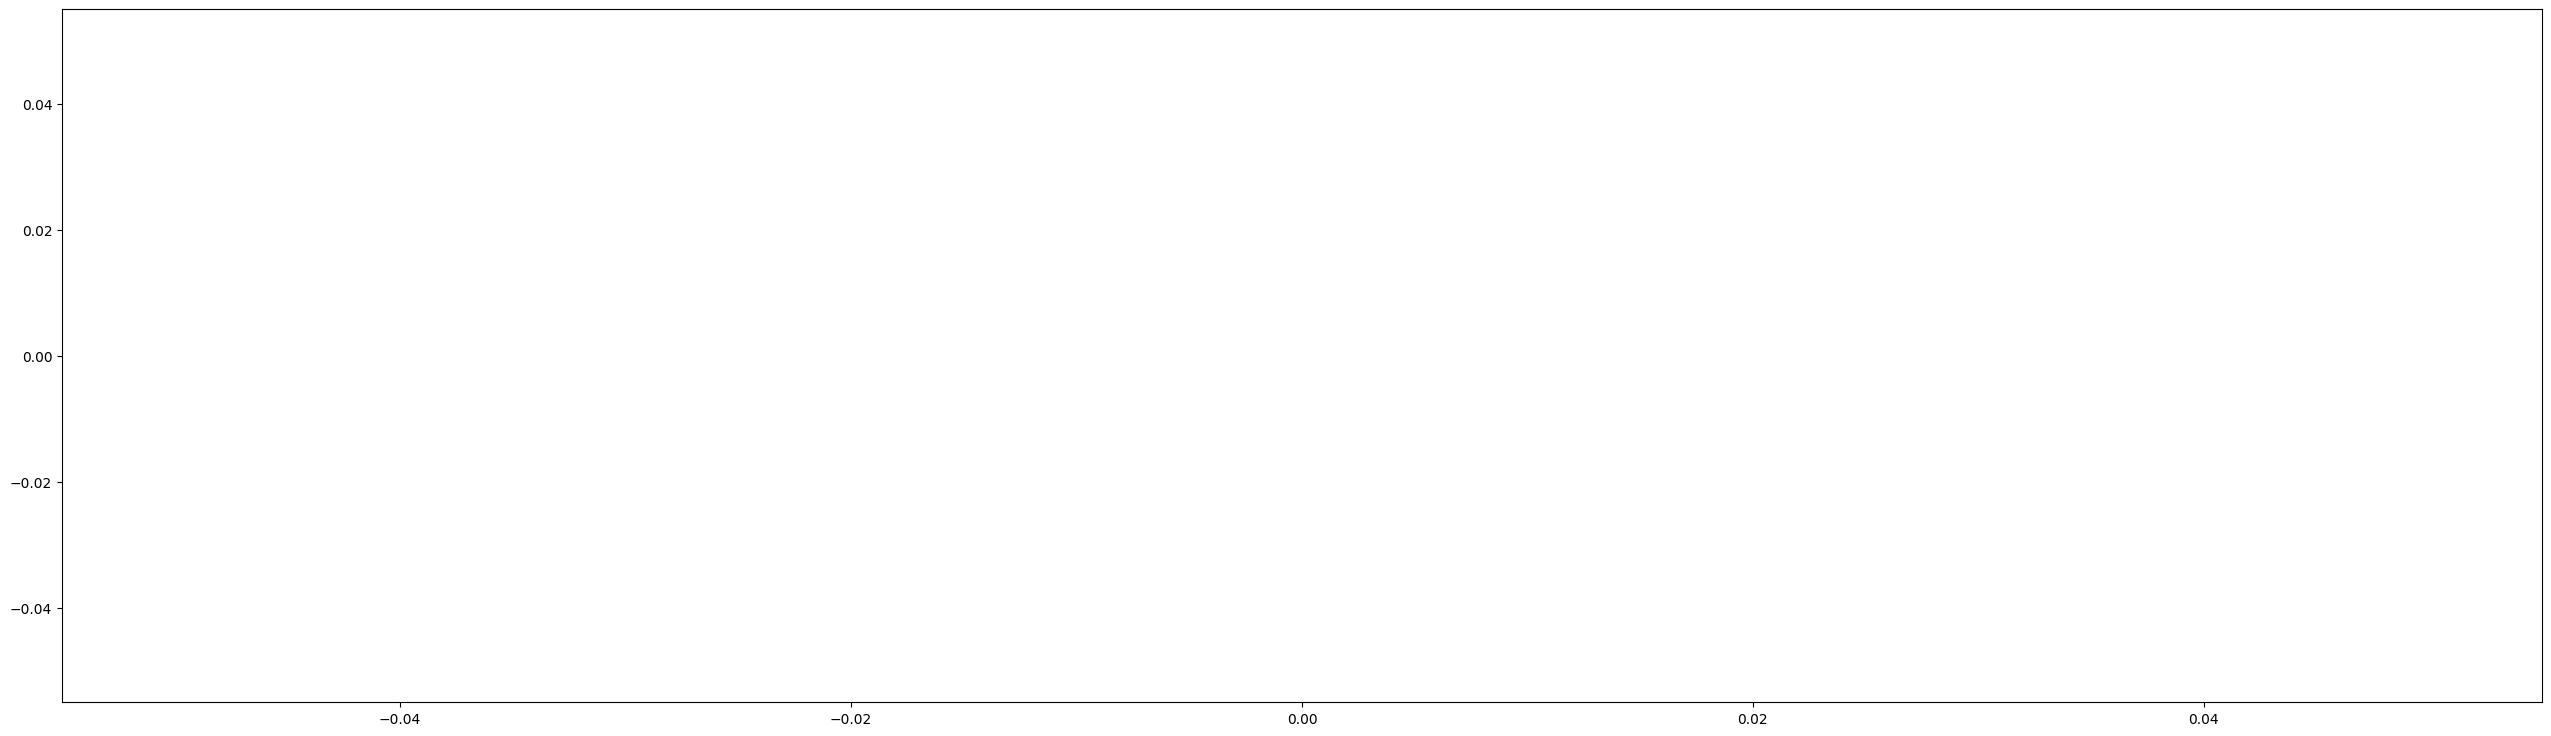

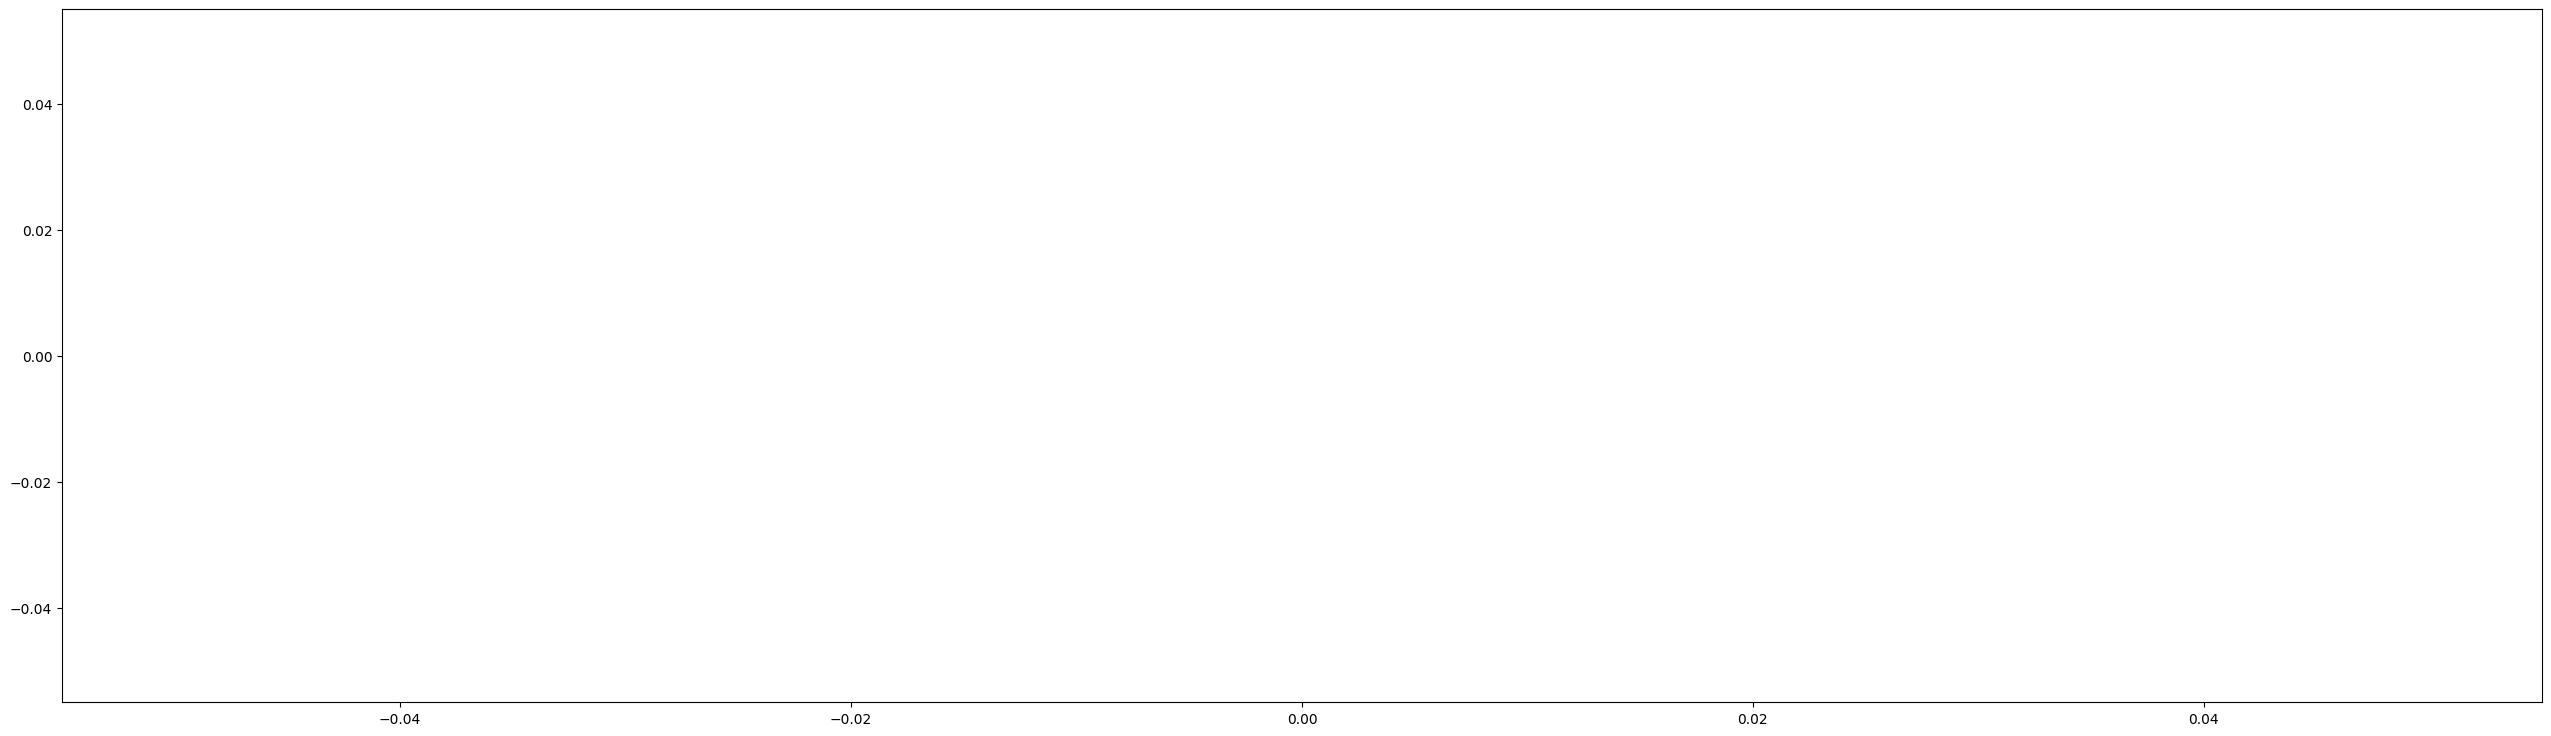

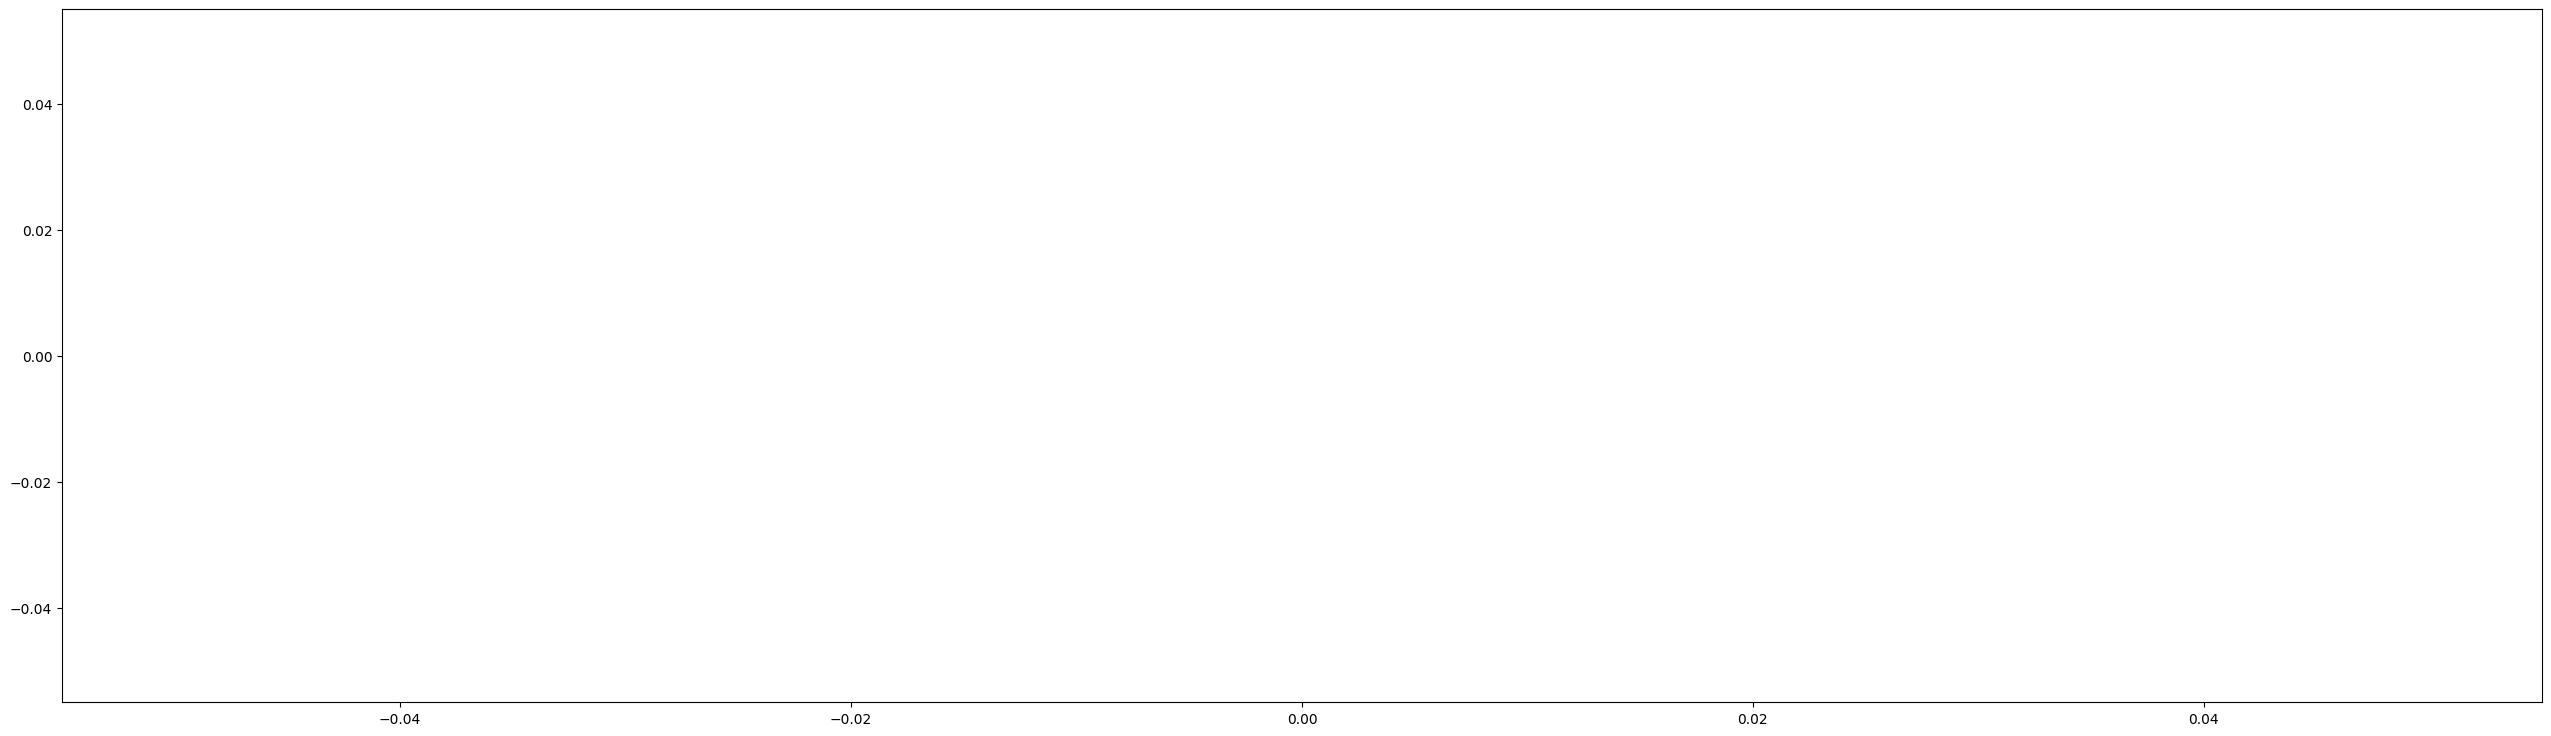

In [6]:
figure = plt.figure(figsize=(32,9))
plt.plot(vel_hist)

figure = plt.figure(figsize=(32,9))
plt.plot(avel_hist)

# figure = plt.figure(figsize=(32,9))
# ctrl_x, ctrl_y, ctrl_z = zip(*ctrl_hist)
# linear_ctrl_norm = np.sqrt(np.square(ctrl_x) + np.square(ctrl_y))
# plt.plot(np.round(linear_ctrl_norm,4))

figure = plt.figure(figsize=(32,9))
plt.plot(angle_hist)

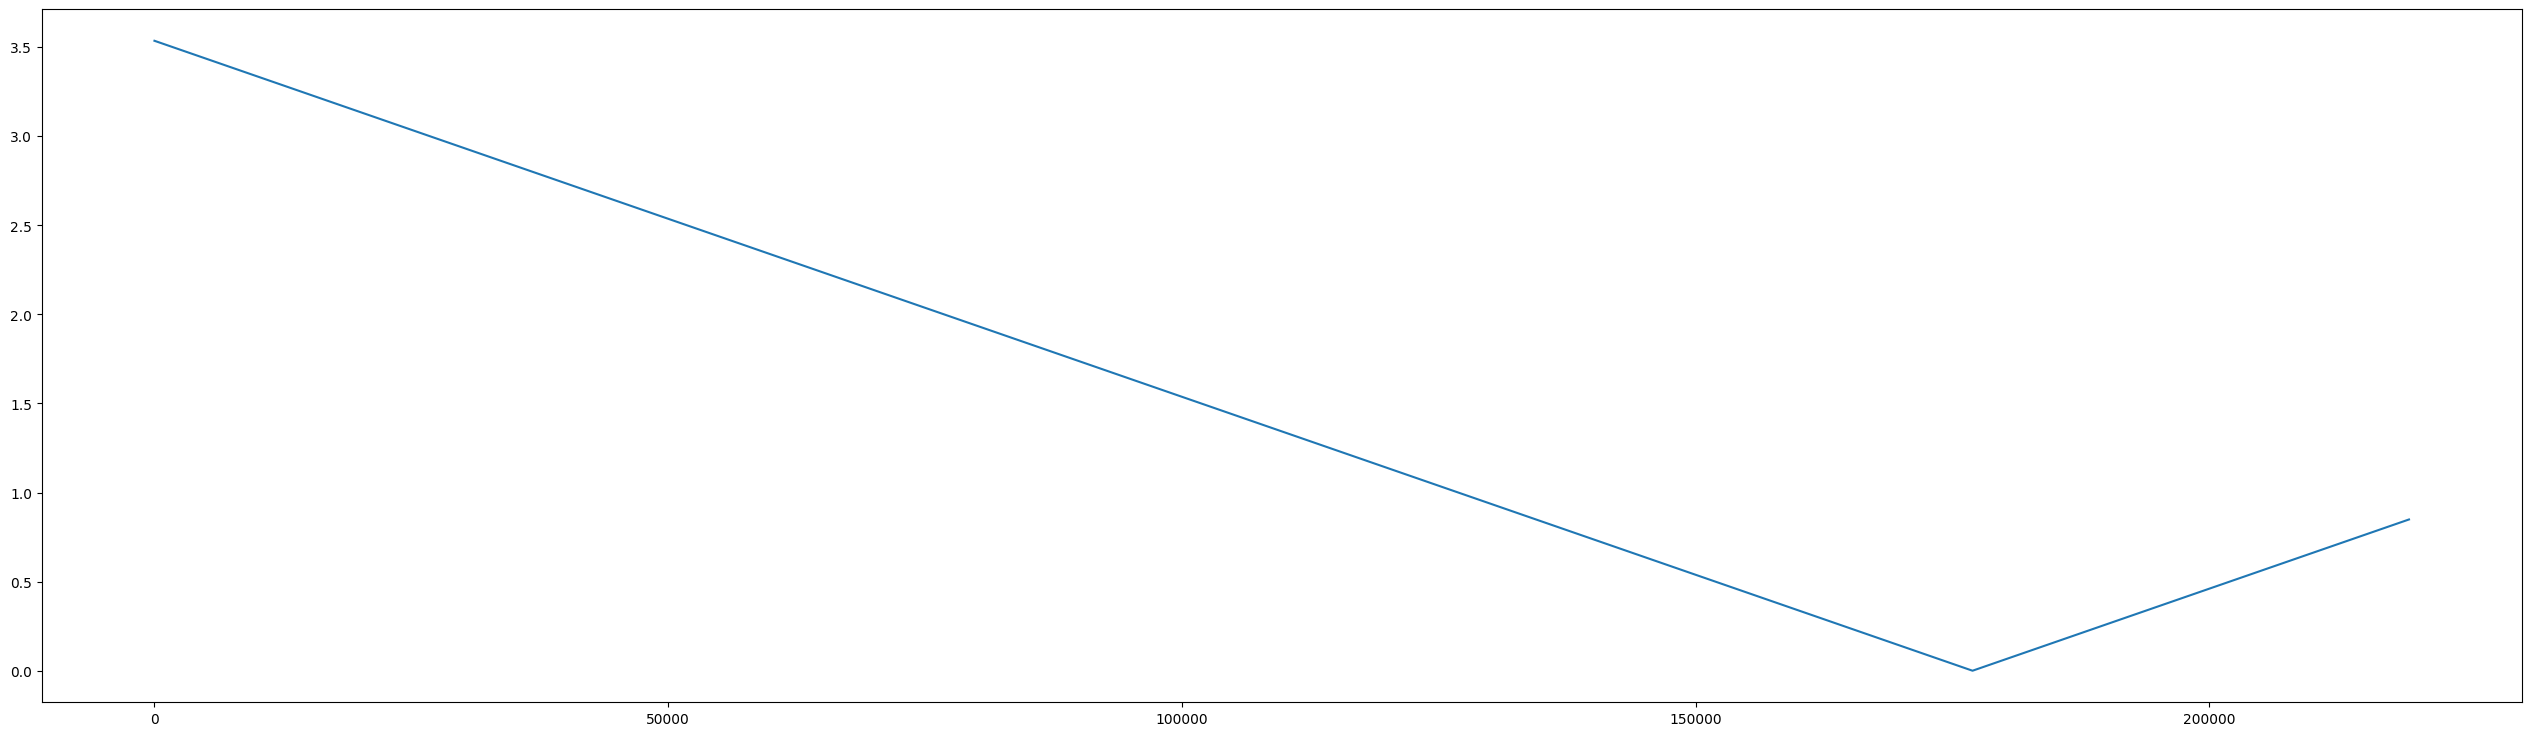

In [7]:
figure = plt.figure(figsize=(32,9))
plt.plot(d_goal_hist)

In [ ]:
theta_range = np.linspace(0, 2*np.pi, num=100)
action = np.array([0.05, 0, 0], dtype=np.float32)
action_mag_hist = np.zeros(len(theta_range))

for idx, theta in enumerate(theta_range):
    rot_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                        [np.sin(theta), np.cos(theta)]], dtype=np.float32)
    action_transformed = action
    action_transformed[:2] = rot_matrix @ action[:2]
    # print(action_transformed)
    action_mag_hist[idx] = np.linalg.norm(action_transformed[:2])

action_mag_hist